In [1]:
# choose the subject to analysis
subject = 'A03'

In [2]:
import numpy as np
import mne
from scipy.io import loadmat
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

A01_label0_ls = [47, 13, 17, 38, 59]
A01_label1_ls = [0, 27, 22, 19, 64]
A01_label2_ls = [62, 48, 33, 51, 68]
A01_label3_ls = [16, 62, 0, 25, 36]

A02_label0_ls = [17, 55, 46, 40, 20]
A02_label1_ls = [3, 20, 59, 39, 7]
A02_label2_ls = [8, 0, 11, 5, 49]
A02_label3_ls = [64, 66, 45, 48, 56]

A03_label0_ls = [23, 28, 63, 59, 21]
A03_label1_ls = [68, 67, 63, 49, 35]
A03_label2_ls = [16, 7, 15, 41, 62]
A03_label3_ls = [61, 16, 59, 60, 25]

A04_label0_ls = [3, 48, 15, 38, 55]
A04_label1_ls = [40, 9, 4, 21, 24]
A04_label2_ls = [56, 40, 10, 29, 2]
A04_label3_ls = [29, 27, 46, 60, 61]

A05_label0_ls = [67, 9, 2, 57, 25]
A05_label1_ls = [12, 29, 14, 18, 43]
A05_label2_ls = [46, 25, 26, 43, 9]
A05_label3_ls = [43, 64, 17, 52, 67]

A06_label0_ls = [44, 50, 30, 57, 40]
A06_label1_ls = [38, 26, 5, 47, 22]
A06_label2_ls = [43, 36, 54, 45, 31]
A06_label3_ls = [68, 42, 71, 57, 48]

A07_label0_ls = [59, 34, 2, 12, 54]
A07_label1_ls = [8, 67, 57, 59, 69]
A07_label2_ls = [12, 43, 8, 1, 38]
A07_label3_ls = [16, 34, 2, 15, 25]

A08_label0_ls = [34, 23, 11, 37, 53]
A08_label1_ls = [50, 29, 8, 7, 32]
A08_label2_ls = [39, 21, 45, 0, 42]
A08_label3_ls = [57, 47, 37, 69, 56]

A09_label0_ls = [35, 3, 5, 48, 51]
A09_label1_ls = [27, 15, 5, 24, 13]
A09_label2_ls = [38, 32, 49, 6, 52]
A09_label3_ls = [50, 62, 14, 11, 49]

label0_total = {'A01':A01_label0_ls, 'A02':A02_label0_ls, 'A03':A03_label0_ls, 'A04':A04_label0_ls,  
                'A05':A05_label0_ls, 'A06': A06_label0_ls, 'A07':A07_label0_ls, 'A08': A08_label0_ls,   
                'A09':A09_label0_ls}

label1_total = {'A01':A01_label1_ls, 'A02':A02_label1_ls, 'A03':A03_label1_ls,  'A04':A04_label1_ls, 
                'A05':A05_label1_ls, 'A06': A06_label1_ls, 'A07':A07_label1_ls, 'A08': A08_label1_ls,   
                'A09':A09_label1_ls}

label2_total = {'A01':A01_label2_ls, 'A02':A02_label2_ls, 'A03':A03_label2_ls,  'A04':A04_label2_ls,  
                'A05':A05_label2_ls, 'A06': A06_label2_ls, 'A07':A07_label2_ls,  'A08': A08_label2_ls,  
                'A09':A09_label2_ls}

label3_total = {'A01':A01_label3_ls, 'A02':A02_label3_ls, 'A03':A03_label3_ls,  'A04':A04_label3_ls, 
                'A05':A05_label3_ls,  'A06': A06_label3_ls, 'A07':A07_label3_ls, 'A08': A08_label3_ls, 
                'A09':A09_label3_ls}


data_path = "/home/dog/Documents/EEGDataSet/BCICIV_2a_gdf/"
data_name = 'A03T.gdf'  # 只能调用T, 调用E需要给出label的标签
root = data_path+data_name
raw_gdf = mne.io.read_raw_gdf(root, verbose='ERROR', exclude='EOG')
print(raw_gdf.info)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2004-11-09 12:00:00 UTC
 nchan: 22
 projs: []
 sfreq: 250.0 Hz
>


/home/dog/anaconda3/lib/python3.7/site-packages/mne/io/edf/edf.py:1155: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]


In [3]:
# 原始的EEG是按照数字排列的, 
chan_names = ['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2',
            'C4', 'C6','CP3', 'CP1', 'CPz','CP2', 'CP4', 'P1','Pz','P2', 'POz']

MI_info = mne.create_info(chan_names, sfreq=250, ch_types='eeg')

In [4]:
from scipy.signal import savgol_filter

dataset = 'BCIIV2A'
cam_folder = '/home/dog/code_T640/EignCAM/eeg_cam_fig_{}'.format(dataset)


def cam_label_ls(label2CAM, label_index_ls, temporal_layer=True):
    cam_ls = []
    conv_layer = 'temporal' if temporal_layer else 'channel'
    for i in label_index_ls:
        trial_label = 'eigencam_{layer}_label{label2CAM}_[{label_index}].csv'.format(layer=conv_layer, 
                                                                                  label2CAM=label2CAM,
                                                                                        label_index=i)
        cam_ls.append(trial_label)
    return cam_ls


def cam_trial_csv(subject, cam_label_ls, cam_folder=cam_folder):
    cam_trial = []
    if isinstance(cam_label_ls, list):
        for i in cam_label_ls:
            cam_path = os.path.join(cam_folder, subject, i)
            cam_pd = pd.read_csv(cam_path, header=None)
            cam_np = cam_pd.to_numpy()
            cam_trial.append(cam_np)
    else:
        cam_path = os.path.join(cam_folder, subject, eigengradcam_name)
        cam_pd = pd.read_csv(cam_path, header=None)
        cam_np = cam_pd.to_numpy()
        cam_trial.append(cam_np)
    return np.array(cam_trial)


def get_sub_mean(label2CAM, temporal_layer=True):
    assert label2CAM in [0, 1, 2, 3]
    if label2CAM==0:
        sub_dic = label0_total
    elif label2CAM==1:
        sub_dic = label1_total
    elif label2CAM==2:
        sub_dic = label2_total
    else:
        sub_dic = label3_total
    
    label_cam = []
    
    for key,value in sub_dic.items():
        cam_ls = cam_label_ls(label2CAM, sub_dic[key], temporal_layer=temporal_layer)
        sub_trials = cam_trial_csv(key, cam_ls)
        label_cam.append(sub_trials)
        
    label_cam = np.array(label_cam).squeeze()
    return label_cam

def get_single_sub(sub_label_ls, label2CAM, subject, temporal_layer=True):
    label_cam = []
    cam_ls = cam_label_ls(label2CAM, sub_label_ls, temporal_layer=temporal_layer)
    sub_trials = cam_trial_csv(subject, cam_ls)
    label_cam.append(sub_trials)     
    label_cam = np.array(label_cam).squeeze()
    return label_cam


sub_tem_label0 = get_single_sub(label0_total[subject], 0, subject, temporal_layer=True)
sub_tem_label1 = get_single_sub(label1_total[subject], 1, subject, temporal_layer=True)
sub_tem_label2 = get_single_sub(label2_total[subject], 2, subject, temporal_layer=True)
sub_tem_label3 = get_single_sub(label3_total[subject], 3, subject, temporal_layer=True)

sub_chan_label0 = get_single_sub(label0_total[subject], 0, subject, temporal_layer=False)
sub_chan_label1 = get_single_sub(label1_total[subject], 1, subject, temporal_layer=False)
sub_chan_label2 = get_single_sub(label2_total[subject], 2, subject, temporal_layer=False)
sub_chan_label3 = get_single_sub(label3_total[subject], 3, subject, temporal_layer=False)

print(sub_tem_label0.shape)
print(sub_chan_label0.shape)

(5, 22, 1125)
(5, 22, 1125)


## 不使用pooling or smooth, 对原始特征进行分析

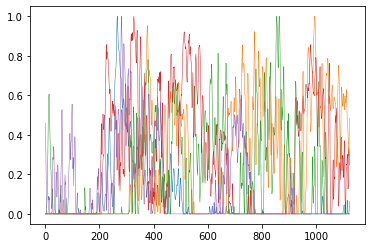

In [5]:
ndarray = np.mean(sub_chan_label0, axis=1)
plt.plot(ndarray.T, linewidth=0.5)

In [6]:
from scipy.special import softmax
import heapq

def find_firstN_peaksIN_time_samples(label0_times, n=10):
    largest_label0 = heapq.nlargest(n, range(len(label0_times)), label0_times.take)
    return largest_label0

### 寻找每个标签, 每个trial前n (n=10) 的最大值对应的是时域位置

In [7]:
sub_chan_dict = {'label0':sub_chan_label0, 'label1':sub_chan_label1, 
                 'label2':sub_chan_label2, 'label3':sub_chan_label3}

sub_temp_dict = {'label0':sub_tem_label0, 'label1':sub_tem_label1, 
                 'label2':sub_tem_label2, 'label3':sub_tem_label3}

def find_time_peaks_per_class(label='label0', n=10):
    all_trial_location = []
    for trial in range(5):
        firstN_trial =  find_firstN_peaksIN_time_samples(np.mean(sub_chan_dict[label], axis=1)[trial], n)
        print('location of {sub} in {label} trial{trial}: '.format(sub=subject, label=label, trial=trial), firstN_trial)
        all_trial_location.append(firstN_trial)
    return np.array(all_trial_location)

In [8]:
sub_label0 = find_time_peaks_per_class(label='label0')

location of A03 in label0 trial0:  [266, 265, 267, 264, 268, 269, 270, 263, 271, 272]
location of A03 in label0 trial1:  [995, 996, 994, 993, 377, 997, 376, 378, 773, 992]
location of A03 in label0 trial2:  [864, 854, 855, 863, 856, 865, 853, 857, 866, 858]
location of A03 in label0 trial3:  [327, 326, 328, 329, 325, 339, 330, 513, 340, 321]
location of A03 in label0 trial4:  [281, 282, 280, 283, 290, 291, 284, 292, 289, 279]


In [9]:
sub_label1 = find_time_peaks_per_class(label='label1')

location of A03 in label1 trial0:  [861, 694, 860, 726, 695, 712, 693, 862, 682, 713]
location of A03 in label1 trial1:  [901, 942, 943, 926, 929, 927, 936, 937, 900, 803]
location of A03 in label1 trial2:  [97, 98, 99, 96, 169, 170, 168, 160, 167, 161]
location of A03 in label1 trial3:  [844, 843, 845, 842, 839, 838, 840, 837, 841, 836]
location of A03 in label1 trial4:  [22, 23, 24, 21, 259, 2, 258, 25, 28, 1]


In [10]:
sub_label2 = find_time_peaks_per_class(label='label2')

location of A03 in label2 trial0:  [831, 806, 830, 822, 807, 832, 834, 810, 811, 821]
location of A03 in label2 trial1:  [33, 32, 1099, 45, 1100, 30, 34, 1098, 44, 29]
location of A03 in label2 trial2:  [263, 264, 262, 265, 258, 259, 257, 261, 266, 256]
location of A03 in label2 trial3:  [257, 256, 258, 255, 259, 254, 248, 247, 249, 260]
location of A03 in label2 trial4:  [258, 257, 254, 256, 255, 253, 259, 252, 102, 251]


In [11]:
sub_label3 = find_time_peaks_per_class(label='label3')

location of A03 in label3 trial0:  [625, 626, 653, 627, 624, 629, 628, 672, 671, 630]
location of A03 in label3 trial1:  [761, 763, 764, 776, 762, 584, 778, 777, 569, 772]
location of A03 in label3 trial2:  [584, 583, 585, 213, 212, 211, 210, 530, 529, 214]
location of A03 in label3 trial3:  [467, 468, 469, 466, 445, 470, 408, 409, 446, 444]
location of A03 in label3 trial4:  [837, 836, 985, 984, 838, 986, 835, 983, 1005, 834]


In [12]:
print(sub_label0.shape)  # trial , Nums

(5, 10)


In [13]:
def probabilistic_channels(loc_label_topN, tem_label):
    # data shape [trial, topN]
    assert loc_label_topN.shape == (5, 10)
    assert tem_label.shape == (5, 22, 1125)
    tem_trial_all = []
    # 得到每一个trial关于channel的概率化的值
    for i in range(len(loc_label_topN)):
        tem_trial = np.sum(tem_label[i, :, loc_label_topN[i]], axis=0)
        tem_trial_softmax = softmax(tem_trial)
        tem_trial_all.append(tem_trial_softmax)
#     print('tem_trial_all.shape: ', np.array(tem_trial_all).shape)
    tem_trial_mean = np.mean(np.array(tem_trial_all), axis=0)
#     print('tem_trial_mean.shape: ', tem_trial_mean.shape)
    return tem_trial_mean

In [14]:
label0_channel = probabilistic_channels(sub_label0, sub_tem_label0)[np.newaxis, :]
label1_channel = probabilistic_channels(sub_label1, sub_tem_label1)[np.newaxis, :]
label2_channel = probabilistic_channels(sub_label2, sub_tem_label2)[np.newaxis, :]
label3_channel = probabilistic_channels(sub_label3, sub_tem_label3)[np.newaxis, :]

tem_channel_cam = np.concatenate((label0_channel, label1_channel, label2_channel, label3_channel))
print(tem_channel_cam.shape)

(4, 22)


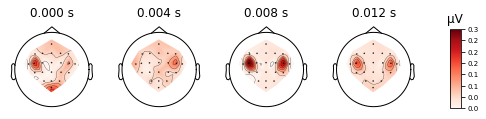

In [15]:
evoked = mne.EvokedArray(tem_channel_cam.T, info=MI_info)
evoked.set_montage('standard_1020')
# fig = evoked.plot_sensors(show_names=True, sphere='auto')
plt = evoked.plot_topomap(times=[0, 0.004, 0.008, 0.012], scalings=1, extrapolate='local', vmin=0)
plt.show()
plt.savefig('{}_MI_channelCAM_soft_trial_no_extrapolate.png'.format(subject), dpi=600, bbox_inches='tight') # 解决图片不清晰，不完整的问题